In [1]:
import pandas as pd
import sys,os,copy,pdb,importlib
sys.path.append('../classes')
sys.path.append('../analysis')
import numpy as np
np.set_printoptions(precision=3,suppress=True)
import matplotlib.pyplot as plt

import tournament_new as tn
import create_database as cd
importlib.reload(tn)

from beck.beck_game import BeckGame as Game
from beck.beck_players import HumanBeckPlayer
from arena import Arena

import mcts

importlib.reload(tn)
game = Game(4,9,4)
all_p = pd.read_pickle(cd.DATABASE_LOC)

from pickle import Pickler, Unpickler

# res = tn.merge_res_to_base()
tournament_res = pd.read_pickle('/scratch/zz737/fiar/tournaments/ai_all_player_round_robin_base.pkl')

from utils import *
mctsargs = dotdict({
        'numMCTSSims': 100,
        'cpuct': 2,
        })


In [365]:
# p2_id = 'tournament_5;mcts100;cpuct2;id-0;12'#'tournament_6;mcts100;cpuct2;id-1;13'# #'tournament_6;mcts100;cpuct2;id-1;best'#
#'tournament_1;mcts50;cpuct1;best'#'tournament_1;mcts100;cpuct2;best'#'tournament_4;mcts100;cpuct2;id-3754964;best'#'cog_id_1;tournament_4;mcts100;cpuct2;id-3754964;best'#'cog_id_1;tournament_1;mcts100;cpuct2;21'
# p2_id = 'tournament_4;mcts100;cpuct2;id-3754964;best'#'tournament_1;mcts100;cpuct2;21'
# p2_id = 'tournament_1;mcts100;cpuct2;best'
# p2_id = p1_id
# p2_id= 'tournament_1;mcts100;cpuct1;6'#'tournament_5;mcts100;cpuct2;id-1;48'
#'tournament_1;mcts50;cpuct1;39'#'tournament_5;mcts100;cpuct2;id-0;best'#'tournament_1;mcts100;cpuct2;best'#'tournament_1;mcts100;cpuct2;21'

game = Game(4,9,4)
select_row_by_id = lambda id,df:df.loc[df['id']==id].iloc[0]
p2_row = select_row_by_id(p2_id,all_p)

p1_row = copy.copy(p2_row)
p1_row.loc[:] = np.nan
p1_row.other_type = 'human'
# p2_row = select_row_by_id(p2_id,all_p)
# p2_row = cd.merge_cog_with_mcts(all_p,'cog_id_1',p1_id)
# p2_row.cpuct = 1

human_p = HumanBeckPlayer(game)
p1 = lambda x:human_p.play(x)

# p1,_,p1_tree = tn.get_player(game, p1_row, temp=0,deterministic=False)
p2,p2_val,p2_tree = tn.get_player(game, p2_row, temp=1/10,deterministic=False)
# p1 = tn.get_player()
arena = Arena(p1, p2, game, display=game.display,tree1=None,tree2=p2_tree)
# res=arena.playGames(10,verbose=True)
arena.playGame(verbose=True)

Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
[ 0 0] [ 0 1] [ 0 2] [ 0 3] [ 0 4] [ 0 5] [ 0 6] [ 0 7] [ 0 8] [ 1 0] [ 1 1] [ 1 2] [ 1 3] [ 1 4] [ 1 5] [ 1 6] [ 1 7] [ 1 8] [ 2 0] [ 2 1] [ 2 2] [ 2 3] [ 2 4] [ 2 5] [ 2 6] [ 2 7] [ 2 8] [ 3 0] [ 3 1] [ 3 2] [ 3 3] [ 3 4] [ 3 5] [ 3 6] [ 3 7] [ 3 8] 3 8
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - O |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - X - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - O |
-----------------------
[ 0 0] [ 0 1] [ 0 2] [ 0 3] [ 0 5] [ 0 6] [ 0 7] [ 0 8] [ 1 0] [ 1 1] [ 1 2] [ 1 3] [ 1 4] [ 1 5] [ 1 6] [ 1 7] [ 1 8] [ 2 0] [ 2 1] [ 2 2] [ 2 3] [ 2 4] [ 2 5] [ 2 6] [ 2 7] [ 2 8] [ 3 0] [ 3 1] [ 3 2] 

KeyboardInterrupt: Interrupted by user

In [359]:
# b_str = '''0 |- - - - - - - - O |
# 1 |- - - - - - - - O |
# 2 |- - - X X - - - O |
# 3 |- - - - - - - - - |
# '''
# b_str='''0 |- - - - - - - - X |
# 1 |- - - - - - - - X |
# 2 |- - - O O O - - X |
# 3 |- - - - - - - - - |'''
b_str = '''0 |- - - - - - - - O |
1 |- - - - - - - - O |
2 |- - - X - - - - O |
3 |- - - - X - - - - |
'''
b_str='''0 |- - - - - - - - O |
1 |- - - - - - - - O |
2 |- - - - - - - - O |
3 |- - - - X X - - - |'''

b_str='''0 |- - - - - - - - X |
1 |- - - - - - - - X |
2 |- - - - - - - - X |
3 |- - - O O O - - - |
'''
b = game.get_board_from_xo_str(b_str)
b = -b
b
b_str_rep = game.stringRepresentation(b)
# b_str_rep = game.stringRepresentation(-b)

In [343]:
from analysis import tree_helper as th
importlib.reload(th)

<module 'analysis.tree_helper' from '../analysis/tree_helper.py'>

In [2]:
import beck.beck_game
importlib.reload(beck.beck_game)
from beck.beck_game import BeckGame as Game
game = Game(4,9,4)

In [357]:
b

array([[ 0,  0,  0,  0,  0,  0,  0,  0, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, -1],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  0]])

In [360]:
p2_tree.game=game
th.get_children(b,p2_tree)

new board
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - O |
1 |- - - - O - - - O |
2 |- - - - - - - - O |
3 |- - - X X X - - - |
-----------------------
action 13
value [-1.]

new board
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - O |
1 |- - - - - - - - O |
2 |- - - - - - - - O |
3 |- - - X X X - - O |
-----------------------
action 35
value 1.0



[(array([[ 0,  0,  0,  0,  0,  0,  0,  0,  1],
         [ 0,  0,  0,  0,  1,  0,  0,  0,  1],
         [ 0,  0,  0,  0,  0,  0,  0,  0,  1],
         [ 0,  0,  0, -1, -1, -1,  0,  0,  0]]),
  13,
  array([-1.], dtype=float32)),
 (array([[ 0,  0,  0,  0,  0,  0,  0,  0,  1],
         [ 0,  0,  0,  0,  0,  0,  0,  0,  1],
         [ 0,  0,  0,  0,  0,  0,  0,  0,  1],
         [ 0,  0,  0, -1, -1, -1,  0,  0,  1]]),
  35,
  1.0)]

In [346]:
self=p2_tree
s=b_str_rep
counts = np.array([self.Nsa[(s, a)] if (s, a) in self.Nsa else 0 for a in range(self.game.getActionSize())])
vals = np.array([self.Qsa[(s, a)] if (s, a) in self.Qsa else 0 for a in range(self.game.getActionSize())]).astype(np.float32)
ps = self.Ps[s]
ns = self.Ns[s]

In [347]:
counts

array([ 0,  4,  1,  0,  1,  0,  1,  2,  1,  0,  1,  5,  0,  1,  0,  0,  4,
        0,  0,  0,  1,  0,  2,  2,  1,  2,  3, 61,  0,  0,  2,  0,  1,  2,
        1,  1])

In [348]:
vals

array([ 0.   , -0.537, -0.221,  0.   , -1.   ,  0.   , -0.498, -0.014,
       -0.973,  0.   , -0.995, -0.602,  0.   , -0.973,  0.   ,  0.   ,
       -0.5  ,  0.   ,  0.   ,  0.   , -0.131,  0.   , -0.016, -0.448,
       -0.526, -0.079, -0.335,  0.158,  0.   ,  0.   , -0.362,  0.   ,
       -0.477, -0.137, -0.969, -0.847], dtype=float32)

In [33]:
np.set_printoptions(precision=3,suppress=True)

In [349]:
eps = 1
vals + 2 * ps * np.sqrt(ns + eps)/(1+counts)

array([ 0.   ,  0.098, -0.123,  0.171, -0.905,  0.114, -0.227,  0.046,
       -0.562,  0.   , -0.884,  0.17 ,  0.178, -0.871,  0.039,  0.114,
        0.071,  0.168,  0.   ,  0.032,  0.087,  0.   ,  0.13 , -0.221,
       -0.353, -0.01 ,  0.09 ,  0.173,  0.165,  0.095, -0.301,  0.   ,
       -0.373, -0.003, -0.86 , -0.708])

In [362]:
b = game.getInitBoard()
# b[:-1,0] = -1
b[:-1,-1] = -1
# b[:-1,-2] = -1

In [363]:
b

array([[ 0,  0,  0,  0,  0,  0,  0,  0, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0]])

val [0.184]


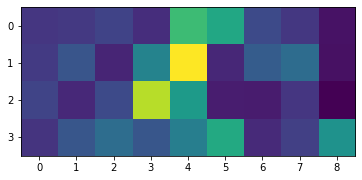

In [364]:
policy,val = p2_val.predict(b)
print(f'val {val}')
plt.imshow(policy.reshape(4,9))


# partial model

In [243]:
from tensorflow.python.keras import backend as K
model = p2_val.nnet.model
inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functors = [K.function([inp, backend.symbolic_learning_phase()], [out]) for out in outputs]    # evaluation functions

# Testing
# test = np.random.random([4,9])[np.newaxis,...]
# test = opt_boards[10:12]
test = b[None,:,:]
layer_outs = [func([test, False]) for func in functors]
# print(layer_outs)

In [188]:
model.layers

In [366]:
layer_outs[1 + 4 * 3][0].shape

(1, 1, 6, 512)

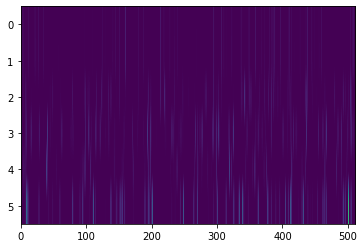

In [244]:
plt.imshow(layer_outs[1 + 4 * 3][0][0,0],aspect='auto')



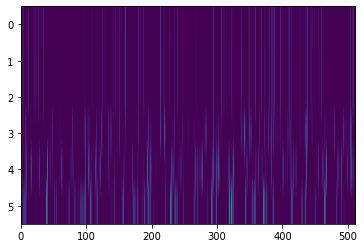

In [240]:
plt.imshow(layer_outs[1 + 4 * 3][0][0,0],aspect='auto')



# find similar boards in trainexamples

In [319]:
from cog_related import cog_value_net as cvn

In [321]:
feat_vals,feat_names = cvn.get_all_feat(te_batch,cvn.get_inv_dist_to_center(game))

In [336]:
te_batch[(feat_vals[:,-2]==1)][40]

array([[ 1,  0,  0, -1,  1,  0,  0,  0, -1],
       [ 0,  0,  0,  0,  1, -1,  1,  1,  0],
       [-1,  1,  0,  0, -1, -1,  1,  0, -1],
       [-1,  0, -1,  0,  0,  0,  1,  0,  1]])

In [320]:
te_batch

array([[[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       ...,

       [[-1,  1,  1, ...,  1,  1, -1],
        [-1,  1,  1, ..., -1,  1,  0],
        [ 1,  1,  1, ...,  1,  1,  1],
        [-1, -1, -1, ...,  1, -1, -1]],

       [[-1,  1,  1, ...,  1,  1, -1],
        [ 0,  1, -1, ...,  1,  1, -1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [-1, -1,  1, ..., -1, -1, -1]],

       [[-1, -1, -1, ...,  1, -1, -1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [-1,  1,  1, ..., -1,  1,  0],
        [-1,  1,  1, ...,  1,  1, -1]]])

In [317]:
modelFile = p2_row.mcts_location
# modelFile=modelFile.replace('best','checkpoint_47')
examplesFile = modelFile + ".examples"
with open(examplesFile, "rb") as f:
    trainExamplesHistory = Unpickler(f).load()

trainExamples = []
for e in trainExamplesHistory:
    trainExamples.extend(e)

def stddize(x):
    return (x - x.mean(axis=(-1,-2),keepdims=True) / x.std(axis=(-1,-2),keepdims=True))

te_batch = np.stack([te[0] for te in trainExamples],axis=0)

te_batch_stddz = (te_batch - te_batch.mean(axis=(1,2),keepdims=True)) / te_batch.std(axis=(1,2),keepdims=True)

b_stddz = stddize(b)

prod = np.einsum('ij,bij->b',b_stddz,te_batch_stddz)

ind=np.nanargmax(prod)

trainExamples[ind]

/ext3/miniconda3/envs/fourinarow/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


(array([[ 0,  0,  0,  1,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  1,  0, -1,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0, -1],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0]]),
 array([0.  , 0.03, 0.96, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ]),
 1)

# other failures

In [48]:

game = Game(4,9,4)
select_row_by_id = lambda id,df:df.loc[df['id']==id].iloc[0]
p2_id = 'tournament_1;mcts100;cpuct2;best'
p2_row = select_row_by_id(p2_id,all_p)

p1_row = copy.copy(p2_row)
p1_row.loc[:] = np.nan
p1_row.other_type = 'human'
# p2_row = select_row_by_id(p2_id,all_p)
# p2_row = cd.merge_cog_with_mcts(all_p,'cog_id_1',p1_id)
# p2_row.cpuct = 1

human_p = HumanBeckPlayer(game)
p1 = lambda x:human_p.play(x)

# p1,_,p1_tree = tn.get_player(game, p1_row, temp=0,deterministic=False)
p2,p2_val,p2_tree = tn.get_player(game, p2_row, temp=1/10,deterministic=False)

arena = Arena(p2, p1, game, display=game.display,tree1=None,tree2=p2_tree)
# res=arena.playGames(10,verbose=True)
arena.playGame(verbose=True)


Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - O - - - |
-----------------------
[ 0 0] [ 0 1] [ 0 2] [ 0 3] [ 0 4] [ 0 5] [ 0 6] [ 0 7] [ 0 8] [ 1 0] [ 1 1] [ 1 2] [ 1 3] [ 1 4] [ 1 5] [ 1 6] [ 1 7] [ 1 8] [ 2 0] [ 2 1] [ 2 2] [ 2 3] [ 2 4] [ 2 5] [ 2 6] [ 2 7] [ 2 8] [ 3 0] [ 3 1] [ 3 2] [ 3 3] [ 3 4] [ 3 6] [ 3 7] [ 3 8] 3 6
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - O X - - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - O - - |
3 |- - - - - O X - - |
-----------------------
[ 0 0] [ 0 1] [ 0 2] [ 0 3] [

1

In [63]:
b_str = '''0 |- - - - O X - X - |
1 |- - X O O O X - - |
2 |X O O O X O O - - |
3 |- X O X X - - - - |
'''
# b_str='''0 |- - - - O X - X - |
# 1 |- - X O O O X - - |
# 2 |X O O O X O O X - |
# 3 |- X O X X - - - - |
# '''

b = game.get_board_from_xo_str(b_str)
# b = -b
b_str_rep = b.tostring()
b

array([[ 0,  0,  0,  0,  1, -1,  0, -1,  0],
       [ 0,  0, -1,  1,  1,  1, -1,  0,  0],
       [-1,  1,  1,  1, -1,  1,  1,  0,  0],
       [ 0, -1,  1, -1, -1,  0,  0,  0,  0]])

In [37]:
b[0,3] = 1
b = -b
b_str_rep = b.tostring()
b

array([[ 0,  0,  0, -1, -1,  1,  0,  1,  0],
       [ 0,  0,  1, -1, -1, -1,  1,  0,  0],
       [ 1, -1, -1, -1,  1, -1, -1,  1,  0],
       [ 0,  1, -1,  1,  1,  0,  0,  0,  0]])

In [40]:
self=p2_tree
s=b_str_rep
counts = np.array([self.Nsa[(s, a)] if (s, a) in self.Nsa else 0 for a in range(self.game.getActionSize())])
vals = np.array([self.Qsa[(s, a)] if (s, a) in self.Qsa else 0 for a in range(self.game.getActionSize())]).astype(np.float32)
ps = self.Ps[s]
ns = self.Ns[s]

In [41]:
p2_tree.getActionProb(b)

[0.0,
 0.0,
 0.0,
 0.026881720430107527,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3817204301075269,
 0.5913978494623656]

In [26]:
b = game.getInitBoard()
b[0,4]=1
b[1,5]=1
b[2,6]=1
b[1,4]=1
b[2,5]=1
b[0,5]=-1
b[1,6]=-1
b

array([[ 0,  0,  0,  0,  1, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1, -1,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [54]:
b

array([[ 0,  0,  0,  0,  1, -1,  0, -1,  0],
       [ 0,  0, -1,  1,  1,  1, -1,  0,  0],
       [-1,  1,  1,  1, -1,  1,  1, -1,  0],
       [ 0, -1,  1, -1, -1,  0,  0,  0,  0]])

[0.019]


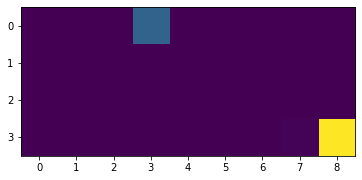

In [53]:
po,va = p2_val.predict(b)
print(va)
plt.imshow(po.reshape(4,9))

In [2]:
import supervised_learning as sl
from importlib import reload
reload(sl)

<module 'supervised_learning' from '../classes/supervised_learning.py'>

In [17]:
sl_folder = '/scratch/zz737/fiar/sl'

args = sl.args
args.num_channels=256
ores=sl.OthelloNNet_resnet(game,args)
resnet = sl.NNetWrapper(game,args,ores)
resnet.load_checkpoint(folder=sl_folder, filename='res_Ex_tournament_6_mcts100_cpuct2_id_1_iter55.pth.tar')

args = sl.get_args()
oks4 =sl.OthelloNNet_ks4(game,args)
ks4net = sl.NNetWrapper(game,args,oks4)
ks4net.load_checkpoint(folder=sl_folder, filename = 'ks4_Ex_tournament_1_mcts100_cpuct2_iter39.pth.tar')


In [84]:
-b

array([[ 0,  0,  0,  0, -1,  1,  0,  1,  0],
       [ 0,  0,  1, -1, -1, -1,  1,  0,  0],
       [ 1, -1, -1, -1,  1, -1, -1,  0,  0],
       [ 0,  1, -1,  1,  1,  0,  0,  0,  0]])

[0.019]


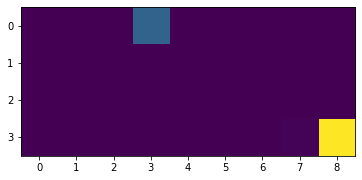

In [57]:
po,va = p2_val.predict(b)
print(va)
plt.imshow(po.reshape(4,9))

In [65]:
b

array([[ 0,  0,  0,  0,  1, -1,  0, -1,  0],
       [ 0,  0, -1,  1,  1,  1, -1,  0,  0],
       [-1,  1,  1,  1, -1,  1,  1,  0,  0],
       [ 0, -1,  1, -1, -1,  0,  0,  0,  0]])

In [85]:
restree = mcts.MCTS(game,resnet,mctsargs)

ks4tree = mcts.MCTS(game,ks4net, mctsargs)

In [67]:
restree.getActionProb(-b)

[0.010101010101010102,
 0.010101010101010102,
 0.010101010101010102,
 0.010101010101010102,
 0.0,
 0.0,
 0.04040404040404041,
 0.0,
 0.010101010101010102,
 0.010101010101010102,
 0.010101010101010102,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.010101010101010102,
 0.010101010101010102,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.04040404040404041,
 0.010101010101010102,
 0.010101010101010102,
 0.0,
 0.0,
 0.0,
 0.0,
 0.010101010101010102,
 0.010101010101010102,
 0.7777777777777778,
 0.010101010101010102]

In [87]:
p2_tree.getActionProb(-b)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.010101010101010102,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8787878787878788,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1111111111111111,
 0.0]

In [86]:
ks4tree.getActionProb(-b)

[0.0,
 0.0,
 0.0,
 0.020202020202020204,
 0.0,
 0.0,
 0.08080808080808081,
 0.0,
 0.0,
 0.010101010101010102,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.43434343434343436,
 0.010101010101010102,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.030303030303030304,
 0.0,
 0.41414141414141414,
 0.0]

In [89]:
# player = 'res'
# print(f'====playing against {player}====')
# p2 = ai_dict[player]
p2 = lambda x: np.random.choice(np.arange(game.getActionSize()),p=ks4tree.getActionProb(x, temp=1/10))
val_func = ks4net#nnet_dict[player]
p2_tree = ks4tree#MCTS(game,val_func,tree_args)
arena = Arena(p1, p2, game, display=game.display,tree1=None,tree2=p2_tree)
# res=arena.playGames(10,verbose=True)
arena.playGame(verbose=True)

Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
[ 0 0] [ 0 1] [ 0 2] [ 0 3] [ 0 4] [ 0 5] [ 0 6] [ 0 7] [ 0 8] [ 1 0] [ 1 1] [ 1 2] [ 1 3] [ 1 4] [ 1 5] [ 1 6] [ 1 7] [ 1 8] [ 2 0] [ 2 1] [ 2 2] [ 2 3] [ 2 4] [ 2 5] [ 2 6] [ 2 7] [ 2 8] [ 3 0] [ 3 1] [ 3 2] [ 3 3] [ 3 4] [ 3 5] [ 3 6] [ 3 7] [ 3 8] 0 0
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - X - - - - - |
-----------------------
[ 0 1] [ 0 2] [ 0 3] [ 0 4] [ 0 5] [ 0 6] [ 0 7] [ 0 8] [ 1 0] [ 1 1] [ 1 2] [ 1 3] [ 1 4] [ 1 5] [ 1 6] [ 1 7] [ 1 8] [ 2 0] [ 2 1] [ 2 2] [ 2 3] [ 2 4] [ 2 5] [ 2 6] [ 2 7] [ 2 8] [ 3 0] [ 3 1] [ 3 2] 

1

In [98]:

reload(sl)

<module 'supervised_learning' from '../classes/supervised_learning.py'>

In [16]:
res_folder = f'/scratch/zz737/fiar/sl/resnet/res3_Ex_tournament_{sl.ex_tournament}_{sl.ex_id}_{sl.ex_fn_part}'
res3 = sl.nnet_dict['res3']
res3.load_checkpoint(folder=res_folder, filename='final.pth.tar')

ValueError: Shapes (3, 3, 256, 256) and (1, 1, 256, 1) are incompatible

In [5]:
res_folder = f'/scratch/zz737/fiar/sl/resnet/res5_Ex_tournament_{sl.ex_tournament}_{sl.ex_id}_{sl.ex_fn_part}'
res5 = sl.nnet_dict['res5']
res5.load_checkpoint(folder=res_folder, filename='final.pth.tar')

In [12]:
res_folder = f'/scratch/zz737/fiar/sl/resnet/res9_Ex_tournament_{sl.ex_tournament}_{sl.ex_id}_{sl.ex_fn_part}'
res9 = sl.nnet_dict['res9']
res9.load_checkpoint(folder=res_folder, filename='final.pth.tar')

In [6]:
res_folder = f'/scratch/zz737/fiar/sl/resnet/res3_ks4_Ex_tournament_{sl.ex_tournament}_{sl.ex_id}_{sl.ex_fn_part}'
res3_ks4 = sl.nnet_dict['res3_ks4']
res3_ks4.load_checkpoint(folder=res_folder, filename='final.pth.tar')

In [7]:
res_folder = f'/scratch/zz737/fiar/sl/resnet/res15_ks4_Ex_tournament_{sl.ex_tournament}_{sl.ex_id}_{sl.ex_fn_part}'
res15_ks4 = sl.nnet_dict['res15_ks4']
res15_ks4.load_checkpoint(folder=res_folder, filename='final.pth.tar')

In [113]:
res_folder = f'/scratch/zz737/fiar/sl/resnet/convsame_Ex_tournament_{sl.ex_tournament}_{sl.ex_id}_{sl.ex_fn_part}'
convsame = sl.nnet_dict['convsame']
convsame.load_checkpoint(folder=res_folder, filename='final.pth.tar')

In [15]:
res_folder = f'/scratch/zz737/fiar/sl/resnet/res15_Ex_tournament_{sl.ex_tournament}_{sl.ex_id}_{sl.ex_fn_part}'
res15 = sl.nnet_dict['res15']
res15.load_checkpoint(folder=res_folder, filename='final.pth.tar')

In [13]:
# player = 'res'
# print(f'====playing against {player}====')
# p2 = ai_dict[player]

# val_func = res3#nnet_dict[player]
# val_func = convsame
# val_func = ks4net
# val_func = resnet
val_func = res9

n_mcts = 100
cpuct = 2
tree_args = dotdict({
'numMCTSSims': n_mcts,
'cpuct': cpuct,
})
p2_tree = mcts.MCTS(game,val_func,tree_args)

p2 = lambda x: np.random.choice(np.arange(game.getActionSize()),p=p2_tree.getActionProb(x, temp=1/10))


human_p = HumanBeckPlayer(game)
p1 = lambda x:human_p.play(x)

arena = Arena(p1, p2, game, display=game.display,tree1=None,tree2=p2_tree)
# res=arena.playGames(10,verbose=True)
arena.playGame(verbose=True)

Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
[ 0 0] [ 0 1] [ 0 2] [ 0 3] [ 0 4] [ 0 5] [ 0 6] [ 0 7] [ 0 8] [ 1 0] [ 1 1] [ 1 2] [ 1 3] [ 1 4] [ 1 5] [ 1 6] [ 1 7] [ 1 8] [ 2 0] [ 2 1] [ 2 2] [ 2 3] [ 2 4] [ 2 5] [ 2 6] [ 2 7] [ 2 8] [ 3 0] [ 3 1] [ 3 2] [ 3 3] [ 3 4] [ 3 5] [ 3 6] [ 3 7] [ 3 8] 0 0
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O - - - - - X - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
[ 0 1] [ 0 2] [ 0 3] [ 0 4] [ 0 5] [ 0 7] [ 0 8] [ 1 0] [ 1 1] [ 1 2] [ 1 3] [ 1 4] [ 1 5] [ 1 6] [ 1 7] [ 1 8] [ 2 0] [ 2 1] [ 2 2] [ 2 3] [ 2 4] [ 2 5] [ 2 6] [ 2 7] [ 2 8] [ 3 0] [ 3 1] [ 3 2] [ 3 3] 

1

In [8]:
b_str = '''0 |- - - - - X - - - |
1 |- - - - X O - - - |
2 |- - - X O O O X - |
3 |- - O X - - - - - |
'''
# b_str='''0 |- - - - O X - X - |
# 1 |- - X O O O X - - |
# 2 |X O O O X O O X - |
# 3 |- X O X X - - - - |
# '''
b_str ='''0 |O - - - - - X - - |
1 |O - - - - X - - - |
2 |O - - O X - - - - |
3 |X - - O - - - - - |'''

b = game.get_board_from_xo_str(b_str)
b = -b
b_str_rep = b.tostring()
b

array([[-1,  0,  0,  0,  0,  0,  1,  0,  0],
       [-1,  0,  0,  0,  0,  1,  0,  0,  0],
       [-1,  0,  0, -1,  1,  0,  0,  0,  0],
       [ 1,  0,  0, -1,  0,  0,  0,  0,  0]])

In [11]:
val_func = res3_ks4
tree = mcts.MCTS(game,val_func,mctsargs)
np.array(tree.getActionProb(b)).reshape(4,9)

array([[0.   , 0.01 , 0.01 , 0.01 , 0.182, 0.162, 0.   , 0.01 , 0.01 ],
       [0.   , 0.02 , 0.01 , 0.192, 0.01 , 0.   , 0.03 , 0.01 , 0.   ],
       [0.   , 0.01 , 0.111, 0.   , 0.   , 0.051, 0.071, 0.01 , 0.01 ],
       [0.   , 0.01 , 0.01 , 0.   , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 ]])

In [24]:
val_func = resnet
tree = mcts.MCTS(game,val_func,mctsargs)
np.array(tree.getActionProb(b)).reshape(4,9)

array([[0.   , 0.071, 0.   , 0.   , 0.121, 0.101, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.465, 0.01 , 0.   , 0.051, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.04 , 0.061, 0.   , 0.   ],
       [0.   , 0.02 , 0.   , 0.   , 0.03 , 0.03 , 0.   , 0.   , 0.   ]])